# Silhouette Score
---
The Silhouette Score measures how similar a point is to its own cluster (cohesion) compared to the closest other cluster (separation). It is computed for each sample and then averaged.

For a data point, $x_{i}$ ,the silhouette score is:

\begin{equation}
s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}
\end{equation}

Note that:
- $a(i)$ is the  average intra-cluster distance (mean distance between $x_{i}$ and all other points in its own cluster). If we let $C_{i}, i= \{ 1,2,3,...n \}$, such that $N_{c_{i}}$ is the total number of cluster in $C_{i}, i= \{ 1,2,3,...n \}$, then:

\begin{equation}
a(i) = \frac{1}{N_{C_i}-1} \sum_{x_{j}\in C_{j}, j \neq i} d(x_{i},x_{j})
\end{equation}

- $b(i)$ Average nearest-cluster distance (mean distance between $x_{i}$ and all points in the nearest different cluster). If we let $K_{i}, i= \{ 1,2,3,...n \}$, such that $N_{k_{i}}$ is the total number of cluster in $K_{i}, i= \{ 1,2,3,...n \}$, then:

\begin{equation}
b(i) = \min_{C_{k} \neq C_{i}} \frac{1}{N_{K_i}} \sum_{x_{j} \in C_{k}} d(x_{i}, x_{j})
\end{equation}

### Interpretation:
---
- $s(i)$ close to 1 $\rightarrow$ well-clustered.
- $s(i)$ close to 0 $\rightarrow$ on the border between two clusters.
- $s(i)$ close to -1 $\rightarrow$ Noisy.

### Index:
---

If $N$ is the total number of points:

\begin{equation}
S = \frac{1}{N} \sum_{i=1}^{N} s(i)
\end{equation}

### Advantages
---

- Balanced measure of compactness and separation:

    - The numerator $b(i)-a(i)$ rewards well separated clusters (why?).
    
    - The denominator $max\{a(i), b(i) \}$ normalizes the value, making it scale-independent (How?).
    
    
- Interpretable range:

    - $s(i)$ between -1 and 1, making it easy to interpret.
    
### Disadvantages:

- Assumes convex clusters:

    - The use of Euclidean distance makes it biased towards spherical clusters, performing poorly for non-convex shapes (How?).
    
- Computationally expensive for large datasets.

# Davies-Bouldin Index (DBI)
---

The Davies-Bouldin Index evaluates the compactness and separation of clusters. Lower values indicate better clustering. Let $K$ be the total number of points.

\begin{equation}
DBI = \frac{1}{K} \sum_{i=1}^{K} \max_{j \neq i} \{ R_{ij} \}
\end{equation}

where:
- $R_{ij}$ is the similarity between cluster $C_{i}$ and $C_{j}$:

\begin{equation}
R_{ij} = \frac{\sigma_{i} + \sigma_{j}}{d_{ij}}
\end{equation}

- $\sigma_{i}$ is the cluster dispersion (mean intra-cluster distance), given that $N_{C_{i}}$ is the number of data points in $C_{i}$:

\begin{equation}
R_{ij} = \frac{1}{N_{C_{i}}} \sum_{x_{k} \in C_{i}} d(x_{k}, \mu_{i})
\end{equation}

- $d_{ij}$ inter-cluster distance, distance between centroid $\mu_{i}$ and $\mu_{j}$.

\begin{equation}
d_{ij} = d(\mu_{i}, \mu_{j})
\end{equation}

### Interpretation
---

- Lower DBI is better, indicating well-separated, compact clusters.

### Advantages
---

- Computationally efficient:

    - Unlike the Silhouette Score, DBI only requires computing distances between centroids, leading to a lower computational cost.

- Automatically determines cluster validity:

    - The max function ensures that clusters too close together are penalized.
    
### Disadvantages
---

- Sensitive to cluster density:

    - $\sigma_{i}$ (variance) scales with data density, leading to biased results when clusters have different densities.
    
- Clusters should be convex:

    - Since it depends on centroids, DBI fails for density-based clustering (e.g., DBSCAN) or irregular clusters.

# Dunn Index
---

The Dunn Index measures the ratio of the smallest inter-cluster distance to the largest intra-cluster distance.

\begin{equation}
D = \frac{\min_{i \neq j} d(C_{i}, C_{j})}{\max_{k} d(C_{k})}
\end{equation}

where:

- $d(C_{i}, C_{j})$ is the inter-cluster distance (typically the minimum Euclidean distance between points in clusters $C_{i}$ and $C_{j}$:

\begin{equation}
d(C_{i}, C_{j}) = \min_{x_{p} \in C_{i}, x_{q} \in C_{j}} d(x_{p}, x_{q})
\end{equation}

- $d(C_{k})$ is the Intra-cluster distance (diameter of cluster $C_{k}$ i.e., max distance between two points within the cluster):

\begin{equation}
d(C_{k}) = \max_{x_{p}, x_{q} \in C_{k}} d(x_{p}, x_{q})
\end{equation}

### Interpretation
---

Higher values are better, indicating well-separated and compact clusters.

### Advantages
---

- Emphasizes well-separated clusters.

    - The numerator ensures that clusters are distant from each other.
    
- Prefers compact clusters.

    - The denominator penalizes large cluster diameters, favoring compact clusters.
    
### Disadvantages
---

- Computationally expensive.

- Sensitive to outliers.

# Calinski-Harabasz Index (CHI)
---

The Calinski-Harabasz Index is based on the variance ratio between inter-cluster dispersion and intra-cluster dispersion.

\begin{equation}
CHI = \frac{\frac{B_{k}}{k-1}}{\frac{W_{k}}{N-k}}
\end{equation}

where:

- $B_{k}$ is the between-cluster dispersion matrix. Given the $C_{i}, i \in \{1,2,..., k \}$ and $N_{C_{i}}$ is the number of data points in $C_{i}$:

\begin{equation}
B_{k} = \sum_{i=1}^{k} N_{C_{i}} [\mu_{i} - \mu_{global}] \cdotp [\mu_{i} - \mu_{global}]^{T} 
\end{equation}

Question:
1. What data structure is $[\mu_{i} - \mu_{global}]$ and $[\mu_{i} - \mu_{global}]^{T}$.
2. What linear algebra operation is $[\mu_{i} - \mu_{global}] \cdotp [\mu_{i} - \mu_{global}]^{T}$?
3. What linaer algebra operation is $N_{C_{i}} [\mu_{i} - \mu_{global}] \cdotp [\mu_{i} - \mu_{global}]^{T} $?

- $W_{k}$ is the within-cluster dispersion matrix.

\begin{equation}
W_{k} = \sum_{i=1}^{k} \sum_{x_{j} \in C_{i}} [x_{j} - \mu_{i}] \cdotp [x_{j} - \mu_{i}]^{T}
\end{equation}

where $u_{i}$ is the centroid of cluster $C_{i}$

### Interpretation
---

Higher values indicate better clustering.

### Advantages
---

- Scales well for large datasets:

     - Since variance-based calculations require fewer operations than pairwise distances, CHI is more efficient than Dunn or Silhouette.

- Works well for convex clusters:

    - CHI maximizes between-cluster separation while minimizing within-cluster variance.

### Disadvantages
---

- Sensitive to the number of clusters:

     - Since the denominator scales with $(N-k)$, CHI can artificially favor larger $k$.

- Fails for non-convex clusters:

    - Assumes that clusters are Gaussian-like, making it unreliable for irregular structures.

# Entropy-Based Clustering Metric
---

Concept:
Inspired by thermodynamic entropy, this metric treats each cluster as a probabilistic system and evaluates its disorder.The entropy of a cluster $C_{i}$ is given by

\begin{equation}
H(C_{i}) = - \sum_{j \in C_{i}} p_{j} log(p_{j})
\end{equation}

where:

- $p_{j}$ is the probability of data point $j$ belonging to cluster $i$. $\mu_{i}$ is the centroid of cluster $C_{i}$, and $x_{j}, x_{k} \in C_{i}|x_{j} \neq x_{k}$

\begin{equation}
p_{j} = \frac{d(x_{j}, \mu_{i})}{\sum_{x_{k} \in C_{i}} d(x_{k},\mu_{i})}
\end{equation}

### Advantages:
---

- Robust to cluster shapes – Works for both spherical and irregular clusters.

- Can measure overlap between clusters – Higher entropy suggests overlapping or ambiguous clusters.

### Disadvantages:
---

- Sensitive to probability estimation – Requires a good distance-to-probability mapping.

- Does not work well for very small clusters – If there are very few points, entropy can be misleading.

# Parameter Hypertuning
---

- Half-moon (representing non-convex clusters),

- Concentric circles (to challenge distance-based clustering methods),

- Two irregular Gaussian clusters (representing compact groups).

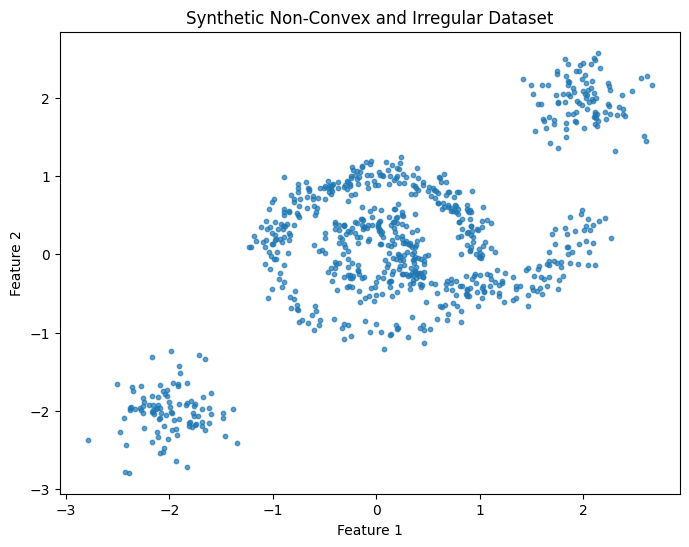

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from scipy.spatial.distance import euclidean

# Set random seed for reproducibility
np.random.seed(42)

# Generate two interleaving half circles (moons)
X_moons, _ = make_moons(n_samples=300, noise=0.1)

# Generate concentric circles
X_circles, _ = make_circles(n_samples=300, factor=0.4, noise=0.1)

# Generate an irregular cluster using a Gaussian distribution
X_gaussian1 = np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2))
X_gaussian2 = np.random.normal(loc=[-2, -2], scale=0.3, size=(100, 2))

# Combine all datasets into a single non-convex, irregular dataset
X_irregular = np.vstack([X_moons, X_circles, X_gaussian1, X_gaussian2])

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_irregular[:, 0], X_irregular[:, 1], s=10, alpha=0.7)
plt.title("Synthetic Non-Convex and Irregular Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


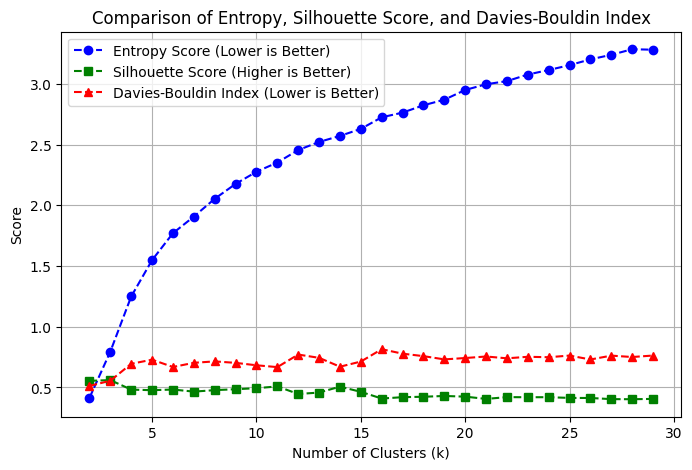

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import entropy

# Set random seed for reproducibility
np.random.seed(42)

# Function to compute entropy-based clustering metric
def cluster_entropy(X, labels):
    """
    Computes the entropy-based clustering metric.
    Lower entropy indicates better clustering.
    """
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()  # Convert counts to probability distribution
    return entropy(probabilities)  # Shannon entropy

# Define the range of k values for KMeans
k_values = range(2, 30)
entropy_scores = []
silhouette_scores = []
dbi_scores = []

# Run KMeans for different values of k and compute metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_irregular)
    
    # Compute Entropy Score (Lower is better)
    entropy_value = cluster_entropy(X_irregular, labels)
    entropy_scores.append(entropy_value)
    
    # Compute Silhouette Score (Higher is better)
    silhouette_scores.append(silhouette_score(X_irregular, labels))
    
    # Compute Davies-Bouldin Index (Lower is better)
    dbi_scores.append(davies_bouldin_score(X_irregular, labels))

# Plot all three metrics
plt.figure(figsize=(8, 5))
plt.plot(k_values, entropy_scores, marker='o', linestyle='dashed', color='blue', label="Entropy Score (Lower is Better)")
plt.plot(k_values, silhouette_scores, marker='s', linestyle='dashed', color='green', label="Silhouette Score (Higher is Better)")
plt.plot(k_values, dbi_scores, marker='^', linestyle='dashed', color='red', label="Davies-Bouldin Index (Lower is Better)")

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Comparison of Entropy, Silhouette Score, and Davies-Bouldin Index")
plt.legend()
plt.grid(True)
plt.show()


# Interpretation of the Plot
---

- Entropy Score (Blue, Lower is Better)

     - Measures the randomness or disorder in the cluster distribution.
     
     - A lower entropy suggests more distinct and well-separated clusters.

- Silhouette Score (Green, Higher is Better)

     - Measures compactness vs. separation.

     - Higher values indicate better-defined clusters.

- Davies-Bouldin Index (Red, Lower is Better)

     - Evaluates compactness and separation.

     - Lower values indicate better clustering quality.

### Choosing the Optimal  $k$:
---

- Look for the lowest entropy score (most structured clusters).

- Find the highest silhouette score (best separation).

- Check the lowest Davies-Bouldin Index (good balance between compactness and separation).

Choose a $k$ where these metrics agree.

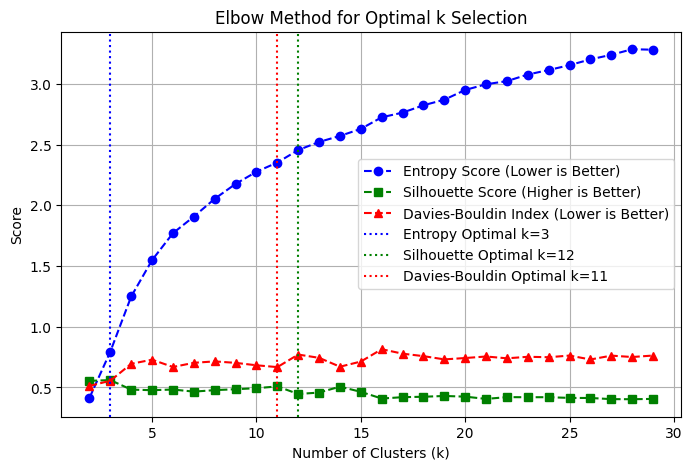

(3, 12, 11)

In [8]:
# Since `kneed` is not available, let's implement the elbow method manually using second derivatives

def find_elbow_point(scores):
    """
    Finds the elbow point in a given score list using second derivative approximation.
    """
    diffs = np.diff(scores)  # First derivative
    second_diffs = np.diff(diffs)  # Second derivative
    elbow_index = np.argmax(second_diffs) + 1  # +1 to adjust for index shift in diff()
    return k_values[elbow_index]

# Find the optimal k using the elbow method for each metric
optimal_k_entropy = find_elbow_point(entropy_scores)
optimal_k_silhouette = find_elbow_point(silhouette_scores)
optimal_k_dbi = find_elbow_point(dbi_scores)

# Plot all three metrics with elbow points
plt.figure(figsize=(8, 5))
plt.plot(k_values, entropy_scores, marker='o', linestyle='dashed', color='blue', label="Entropy Score (Lower is Better)")
plt.plot(k_values, silhouette_scores, marker='s', linestyle='dashed', color='green', label="Silhouette Score (Higher is Better)")
plt.plot(k_values, dbi_scores, marker='^', linestyle='dashed', color='red', label="Davies-Bouldin Index (Lower is Better)")

# Mark the elbow points
plt.axvline(x=optimal_k_entropy, color='blue', linestyle='dotted', label=f"Entropy Optimal k={optimal_k_entropy}")
plt.axvline(x=optimal_k_silhouette, color='green', linestyle='dotted', label=f"Silhouette Optimal k={optimal_k_silhouette}")
plt.axvline(x=optimal_k_dbi, color='red', linestyle='dotted', label=f"Davies-Bouldin Optimal k={optimal_k_dbi}")

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Elbow Method for Optimal k Selection")
plt.legend()
plt.grid(True)
plt.show()

# Output the optimal k values
optimal_k_entropy, optimal_k_silhouette, optimal_k_dbi


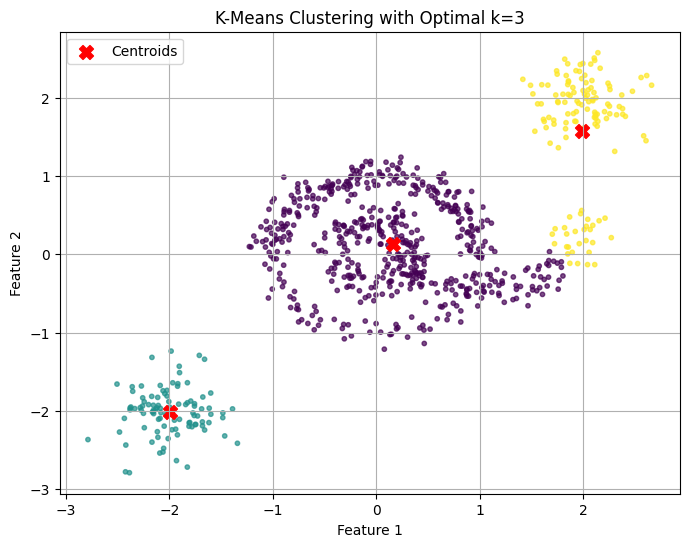

In [10]:
# Find the common optimal k where all three metrics agree
optimal_k_values = [optimal_k_entropy, optimal_k_silhouette, optimal_k_dbi]

# Find the most common k among the three
from collections import Counter
optimal_k_counts = Counter(optimal_k_values)
final_optimal_k = optimal_k_counts.most_common(1)[0][0]  # Most frequent k

# Display the final optimal k
final_optimal_k


# Perform K-Means clustering with the agreed optimal k=3
kmeans_final = KMeans(n_clusters=final_optimal_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_irregular)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_irregular[:, 0], X_irregular[:, 1], c=labels_final, cmap='viridis', s=10, alpha=0.7)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroids')
plt.title(f"K-Means Clustering with Optimal k={final_optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# DBSCAN
---

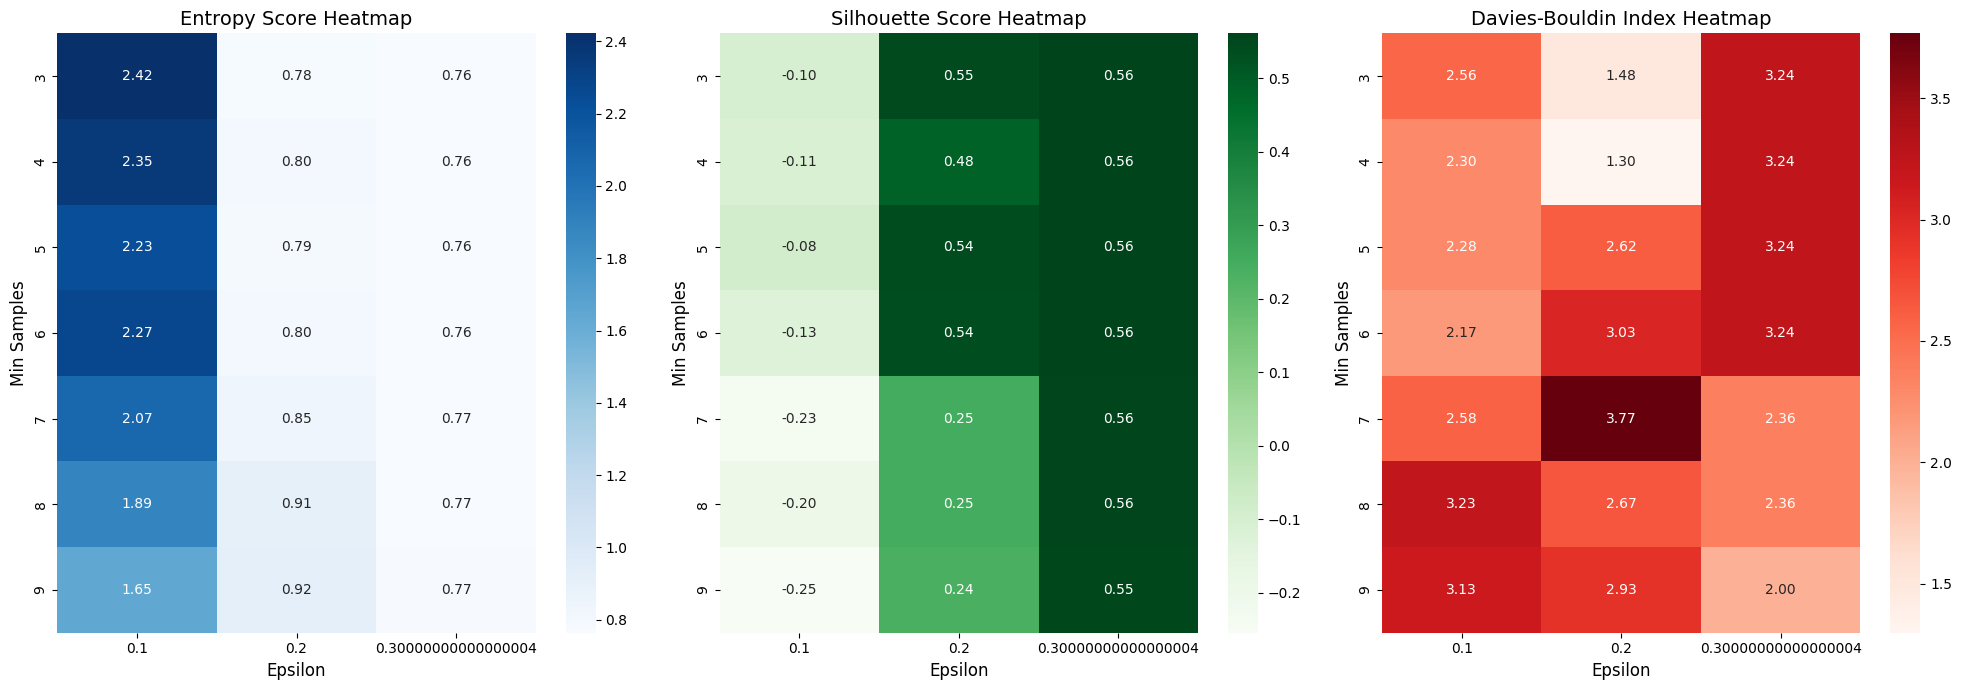

In [18]:
# Fixing the pivot table creation by specifying keyword arguments explicitly

# Correct pivoting
pivot_entropy = df_dbscan.pivot(index="Min_Samples", columns="Epsilon", values="Entropy Score")
pivot_silhouette = df_dbscan.pivot(index="Min_Samples", columns="Epsilon", values="Silhouette Score")
pivot_dbi = df_dbscan.pivot(index="Min_Samples", columns="Epsilon", values="Davies-Bouldin Index")

# Increase the figure size for better visibility
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

# Entropy Score Heatmap
sns.heatmap(pivot_entropy, ax=axes[0], cmap="Blues", annot=True, fmt=".2f")
axes[0].set_title("Entropy Score Heatmap", fontsize=14)
axes[0].set_xlabel("Epsilon", fontsize=12)
axes[0].set_ylabel("Min Samples", fontsize=12)

# Silhouette Score Heatmap
sns.heatmap(pivot_silhouette, ax=axes[1], cmap="Greens", annot=True, fmt=".2f")
axes[1].set_title("Silhouette Score Heatmap", fontsize=14)
axes[1].set_xlabel("Epsilon", fontsize=12)
axes[1].set_ylabel("Min Samples", fontsize=12)

# Davies-Bouldin Index Heatmap
sns.heatmap(pivot_dbi, ax=axes[2], cmap="Reds", annot=True, fmt=".2f")
axes[2].set_title("Davies-Bouldin Index Heatmap", fontsize=14)
axes[2].set_xlabel("Epsilon", fontsize=12)
axes[2].set_ylabel("Min Samples", fontsize=12)

plt.tight_layout()
plt.show()



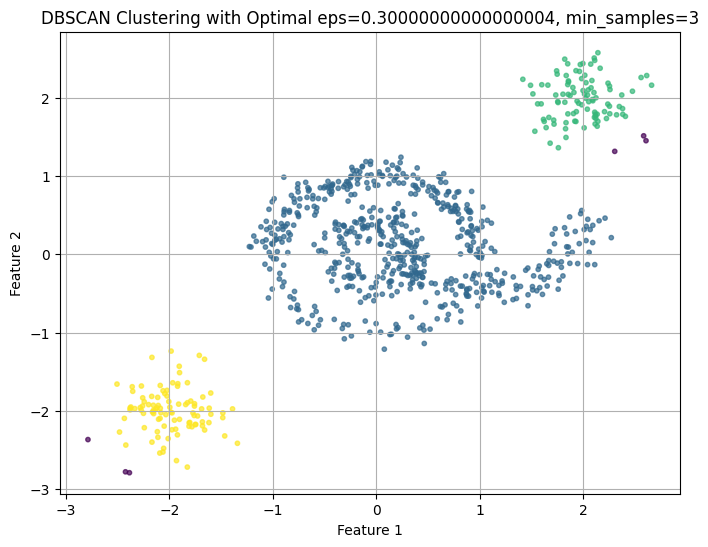

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import entropy
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Generate two interleaving half circles (moons)
X_moons, _ = make_moons(n_samples=300, noise=0.1)

# Generate concentric circles
X_circles, _ = make_circles(n_samples=300, factor=0.4, noise=0.1)

# Generate an irregular cluster using a Gaussian distribution
X_gaussian1 = np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2))
X_gaussian2 = np.random.normal(loc=[-2, -2], scale=0.3, size=(100, 2))

# Combine all datasets into a single non-convex, irregular dataset
X_irregular = np.vstack([X_moons, X_circles, X_gaussian1, X_gaussian2])

# Function to compute entropy-based clustering metric
def cluster_entropy(X, labels):
    """
    Computes the entropy-based clustering metric.
    Lower entropy indicates better clustering.
    """
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()  # Convert counts to probability distribution
    return entropy(probabilities)  # Shannon entropy

# Define a range for epsilon (eps) and min_samples
eps_values = np.linspace(0.1, 1.0, 10)  # 10 values between 0.1 and 1.0
min_samples_values = range(3, 10)  # Min samples from 3 to 10

# Create dictionaries to store scores for different (eps, min_samples) combinations
entropy_scores_dbscan = {}
silhouette_scores_dbscan = {}
dbi_scores_dbscan = {}

# Run DBSCAN for different combinations of (eps, min_samples)
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_irregular)

        # Only compute scores if meaningful clusters exist (more than 1 cluster and not all noise)
        if len(set(labels)) > 1 and -1 in labels:
            entropy_value = cluster_entropy(X_irregular, labels)
            silhouette_value = silhouette_score(X_irregular, labels)
            dbi_value = davies_bouldin_score(X_irregular, labels)

            entropy_scores_dbscan[(eps, min_samples)] = entropy_value
            silhouette_scores_dbscan[(eps, min_samples)] = silhouette_value
            dbi_scores_dbscan[(eps, min_samples)] = dbi_value
        else:
            # Assign NaN if DBSCAN fails (e.g., all points are noise)
            entropy_scores_dbscan[(eps, min_samples)] = np.nan
            silhouette_scores_dbscan[(eps, min_samples)] = np.nan
            dbi_scores_dbscan[(eps, min_samples)] = np.nan

# Convert results to arrays for easier processing
entropy_scores_dbscan = {k: v for k, v in entropy_scores_dbscan.items() if not np.isnan(v)}
silhouette_scores_dbscan = {k: v for k, v in silhouette_scores_dbscan.items() if not np.isnan(v)}
dbi_scores_dbscan = {k: v for k, v in dbi_scores_dbscan.items() if not np.isnan(v)}

# Find optimal hyperparameters for each metric
optimal_eps_min_entropy = min(entropy_scores_dbscan, key=entropy_scores_dbscan.get)
optimal_eps_min_dbi = min(dbi_scores_dbscan, key=dbi_scores_dbscan.get)
optimal_eps_max_silhouette = max(silhouette_scores_dbscan, key=silhouette_scores_dbscan.get)

# Find the most commonly recommended (eps, min_samples)
optimal_eps_min_values = [optimal_eps_min_entropy, optimal_eps_min_dbi, optimal_eps_max_silhouette]
optimal_eps_min_counts = Counter(optimal_eps_min_values)
final_optimal_eps_min = optimal_eps_min_counts.most_common(1)[0][0]

# Perform DBSCAN with the best parameters
best_eps, best_min_samples = final_optimal_eps_min
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_final = dbscan_final.fit_predict(X_irregular)

# Plot the DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_irregular[:, 0], X_irregular[:, 1], c=labels_final, cmap='viridis', s=10, alpha=0.7)
plt.title(f"DBSCAN Clustering with Optimal eps={best_eps}, min_samples={best_min_samples}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
